 # Notes and exercises from [Nielsen2015](http://neuralnetworksanddeeplearning.com/)
 ---

In [1]:
%reset


 ## Ch. 1.1 - Perceptrons

 $ y =
   \begin{cases}
       0 & \text{if } \sum_i w_i x_i \geq \text{threshold} \\
       1 & \text{if } \sum_i w_i x_i < \text{threshold}
   \end{cases} $

 where $y = \text{output}$, $x_i = \text{input}$, and $w_i = \text{weights}$.

 Rewrite conditions as $\boldsymbol{w} \cdot \boldsymbol{x} + b \leq 0$, $> 0$
 where $b = -\text{threshold}$ is the *bias*.

 Perceptrons can be combined to give $\text{AND}, \text{OR}, \text{NAND}$, etc.
 and perform any basic computation.

 ## Ch. 1.2 - Logistic/Sigmoid Neurons

 To optimize $w_i$, the output $y$ should be defined by
 a differentiable *transfer* or *activation* function.

 Let's replace it with the *logistic* or *sigmoid* function
 $f(z) = \frac{1}{1 + \mathrm{e}^{-z}}$
 where $z = \boldsymbol{w} \cdot \boldsymbol{x} + b$.

 Thus,
 $\Delta y \approx \sum_i \frac{\partial y}{\partial w_i} \Delta w_i + \frac{\partial y}{\partial b} \Delta b$

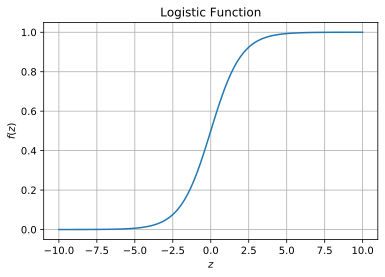

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
f = 1/(1 + np.exp(-z))

plt.plot(z, f)
plt.xlabel('$z$')
plt.ylabel('$f(z)$')
plt.title('Logistic Function')
plt.rc('grid', linestyle = '--', color = 'gray')
plt.grid(True)
plt.show()


 ## Ch. 1.3 - Architecture of Neural Networks

 Layers: *input*, *hidden*, and *output*.

 *Feedforward* neural networks: no loop back.
 *Recurrent* neural networks: feedback loops allowed.

 ## Ch. 1.4 - Simple Network to Classify Handwritten Digits

 Read handwritten digits = *segmentation* + *classification*.

 Exercise: classify greyscale images of handwritten digits ($28 \times 28$ pixels) in
 [MNIST](http://yann.lecun.com/exdb/mnist/) dataset
 (60,000 labeled training images, 10,000 labeled test images)

 | Filename | Content | Size |
 | --- | --- | --- |
 | `train-images-idx3-ubyte.gz` | training set images | $9912422$ bytes |
 | `train-labels-idx1-ubyte.gz` | training set labels | $28881$ bytes |
 | `t10k-images-idx3-ubyte.gz` | test set images | $1648877$ bytes |
 | `t10k-labels-idx1-ubyte.gz` | test set labels | $4542$ bytes |

 Approach: 784 nodes in input layer, $n = 15$ nodes in single hidden layer,
 10 nodes in output layer ($0 \ldots 9$).
 Unzip and read test labels

In [3]:
%reset
import gzip 
with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/t10k-labels-idx1-ubyte.gz', 'rb') as hFile:
    t10k_lab_data = hFile.read()
hFile.close()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Convert binary data to integer array
print(int.from_bytes(t10k_lab_data[0:4], byteorder = 'big', signed = False))
t10k_num = int.from_bytes(t10k_lab_data[4:8], byteorder = 'big', signed = False)

t10k_lab = -1*np.ones((t10k_num, 1))
for i in range(t10k_num): 
    t10k_lab[i] = t10k_lab_data[i + 8]


2049


In [5]:
# Unzip and read test images
with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/t10k-images-idx3-ubyte.gz', 'rb') as hFile:
    t10k_img_data = hFile.read()
hFile.close()


In [6]:
# As before...
print(int.from_bytes(t10k_lab_data[0:4], byteorder = 'big', signed = False))
print(int.from_bytes(t10k_lab_data[4:(4+4)], byteorder = 'big', signed = False))
numRow = int.from_bytes(t10k_img_data[8:(8+4)], byteorder = 'big', signed = False)
numCol = int.from_bytes(t10k_img_data[12:(12+4)], byteorder = 'big', signed = False)

# Image data
numPix = numRow*numCol
t10k_img = -1*np.ones((t10k_num, numPix))
k = 0
for i in range(t10k_num):
    for j in range(numPix):
        k = k + 1
        t10k_img[i, j] = t10k_img_data[i*(numPix) + j + 16]


2049
10000


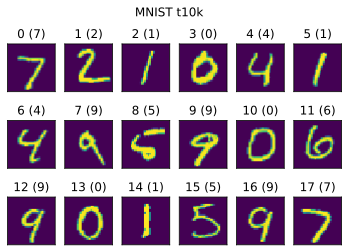

In [7]:
fig = plt.figure(1)
fig.suptitle('MNIST t10k')
for i in range(18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.imshow(np.reshape(t10k_img[i, 0:numPix], (numRow, numCol)))
    ax.set_aspect(aspect = 1)
    ax.tick_params(axis = 'x', bottom = False, labelbottom = False)
    ax.tick_params(axis = 'y', left = False, labelleft = False)
    ax.set_title('%(index)d (%(label)d)' % {'index': i, 'label': t10k_lab[i]})

